REGRESSÃO LINEAR - PARA PRECIFICADOR DE IMÓVEIS

Um dos modelos que será usado para o projeto de precificação de imóveis será o Modelo de Regressão Linear.

A regressão linear múltipla é uma técnica estatística usada para prever valores numéricos contínuos, portanto, esse modelo encontra a relação entre as variáveis dependentes (Y/Valor) e independente (X/características) do nosso conjunto de dados de imóveis.

Mais precisamente, utilizaremos será feito uma Regressão Linear Múltipla, pois precismaos encontrar entre as variáveis independentes (X1, X2, ...,Xn (Características)) e a variável dependente (Y/Valor).

Portanto, em comparação com a regressão linear simples, que envolve apenas uma variável independente, a regressão linear múltipla permite modelar relações mais complexas, levando em consideração múltiplos fatores que podem influenciar a variável dependente.

A equação geral para a regressão linear múltipla é:

𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+...+𝛽𝑛𝑋𝑛+𝜀Y=β0+β1X1+β2X2+...+βnXn+ε

Onde: 

•	Y é a variável dependente que estamos tentando prever.

•	𝑋1,𝑋2,...,𝑋𝑛X1,X2,...,Xn são as variáveis independentes.

•	𝛽0,𝛽1,𝛽2,...,𝛽𝑛β0,β1,β2,...,βn são os coeficientes que representam o efeito de cada variável independente na variável dependente.

•	ε é o erro aleatório.


Essencialmente, a regressão linear múltipla ajuda a entender como as mudanças nas variáveis independentes estão relacionadas às mudanças na variável dependente, controlando os efeitos de outras variáveis independentes no modelo.

In [131]:
## Importação das bibliotecas necessárias para o modelo

# Preparar dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Métricas Regressão
import sklearn.metrics as sm
import numpy as np

import matplotlib.pyplot as plt

# Criar Modelos
from sklearn.linear_model import LinearRegression

In [132]:
# Dados Totais
df = pd.read_csv('https://raw.githubusercontent.com/JanotLucas/Projeto-Integrador-I/main/imoveis.csv')

Análise Descritiva dos dados de imóveis

In [133]:
len(df)

48408

In [134]:
df.head()

,index,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,7000.0,0,0,0,NaN,2000.0,...,0,0,0,0,0,0,0,0,0,Prédio
1,1,Rua 14,2000.0,63.0,2000.0,2,1,1,86.0,486.0,...,0,0,0,0,0,0,0,0,0,Apartamento
2,2,SQNW 310 Bloco B,5100.0,76.0,5100.0,2,1,2,409.0,791.0,...,0,1,0,0,0,0,0,0,0,Apartamento
3,3,Rua COPAIBA,1800.0,32.0,1800.0,0,0,1,NaN,400.0,...,0,0,0,0,0,0,0,0,0,Sala
4,4,SHIS QL 12,95000.0,1952.0,95000.0,15,0,0,15659.0,NaN,...,0,0,0,0,0,0,0,0,0,Casa


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48408 entries, 0 to 48407
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    48408 non-null  int64  
 1   Título                   48408 non-null  object 
 2   Valor                    48402 non-null  float64
 3   area                     48408 non-null  float64
 4   Valor_metro              48402 non-null  float64
 5   quartos                  48408 non-null  int64  
 6   suites                   48408 non-null  int64  
 7   garagem                  48408 non-null  int64  
 8   iptu                     13934 non-null  float64
 9   condominio               22208 non-null  float64
 10  regiao                   48408 non-null  object 
 11  cidade                   48408 non-null  object 
 12  imobiliaria              48408 non-null  object 
 13  creci                    48408 non-null  object 
 14  operacao              

In [136]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                       0.000000
Título                      0.000000
Valor                       0.012395
area                        0.000000
Valor_metro                 0.012395
quartos                     0.000000
suites                      0.000000
garagem                     0.000000
iptu                       71.215502
condominio                 54.123285
regiao                      0.000000
cidade                      0.000000
imobiliaria                 0.000000
creci                       0.000000
operacao                    0.000000
Aquecimento Solar           0.000000
Circuito de TV              0.000000
Gerador de Energia          0.000000
Piscina                     0.000000
Sala de Ginástica           0.000000
Varanda                     0.000000
Cozinha Espaçosa            0.000000
Ar Condicionado             0.000000
Cobertura Coletiva          0.000000
Guarita                     0.000000
PlayGround                  0.000000
Salão de Festas             0.000000
P

Como existe uma alta quantidade de valores nulos na coluna de IPTU, abaixo, será feito um código para analisar os dados de IPTU da base de dados, filtrando por tipo de imóvel e região, contando valores nulos e não nulos de IPTU para cada grupo. Os resultados serão apresentados em uma tabela formatada, facilitando a comparação da quantidade de valores nulos e não nulos de IPTU por região e tipo de imóvel.

In [137]:
from tabulate import tabulate

# Filtrando apenas os valores de IPTU
iptu_df = df[['tipo', 'regiao', 'iptu']]

# Contando os valores nulos e não nulos de IPTU por região e tipo
iptu_nulos_nao_nulos = iptu_df.groupby(['tipo', 'regiao']).agg({'iptu': [lambda x: x.isnull().sum(), lambda x: x.notnull().sum()]})

# Renomeando as colunas para melhorar a legibilidade
iptu_nulos_nao_nulos.columns = ['IPTU Nulos', 'IPTU Não Nulos']

# Convertendo o DataFrame em uma tabela formatada
tabela_formatada = tabulate(iptu_nulos_nao_nulos, headers='keys', tablefmt='fancy_grid')

print("Comparação da quantidade de valores nulos e não nulos de IPTU por região e tipo:")
print(tabela_formatada)

Comparação da quantidade de valores nulos e não nulos de IPTU por região e tipo:
╒═══════════════════════════════════════════════════════════════════════╤══════════════╤══════════════════╕
│                                                                       │   IPTU Nulos │   IPTU Não Nulos │
╞═══════════════════════════════════════════════════════════════════════╪══════════════╪══════════════════╡
│ ('Apartamento', 'ADE')                                                │           17 │                4 │
├───────────────────────────────────────────────────────────────────────┼──────────────┼──────────────────┤
│ ('Apartamento', 'AGUAS LINDAS DE GOIAS')                              │            1 │                0 │
├───────────────────────────────────────────────────────────────────────┼──────────────┼──────────────────┤
│ ('Apartamento', 'ALPHAVILLE BRASILIA')                                │           13 │               12 │
├──────────────────────────────────────────────────────

Após a analise dos dados, será feito o preenchimento dos valores nulos na coluna 'iptu' com as medianas calculadas com base no tipo de imóvel e região, para assim, preencher os valores nulos nessa coluna.

Preencher valores nulos com a mediana calculada para cada tipo de imóvel e região ajuda a garantir a qualidade, integridade e utilidade dos dados, tornando-os mais adequados para análises e modelagem estatística.

In [138]:
# Calculando a mediana por tipo e região
mediana_por_tipo_regiao = df.groupby(['tipo', 'regiao'])['iptu'].transform('median')

# Preenchendo os valores nulos de IPTU com as medianas calculadas
df['iptu'] = df['iptu'].fillna(mediana_por_tipo_regiao)

# Verificando se não há mais valores nulos em IPTU
print("Quantidade de valores nulos em IPTU após o preenchimento:", df['iptu'].isnull().sum())

Quantidade de valores nulos em IPTU após o preenchimento: 1411


Será feito o mesmo para a coluna de 'condominio'.

In [139]:
# Calculando a mediana por tipo e região
mediana_por_tipo_regiao = df.groupby(['tipo', 'regiao'])['condominio'].transform('median')

# Preenchendo os valores nulos de condomínio com as medianas calculadas
df['condominio'] = df['condominio'].fillna(mediana_por_tipo_regiao)

# Verificando se não há mais valores nulos em condomínio
print("Quantidade de valores nulos em condomínio após o preenchimento:", df['condominio'].isnull().sum())

Quantidade de valores nulos em condomínio após o preenchimento: 2789


Após as substituições será feito a exibição da porcentagens de valores nulos da base de dados

In [140]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                      0.000000
Título                     0.000000
Valor                      0.012395
area                       0.000000
Valor_metro                0.012395
quartos                    0.000000
suites                     0.000000
garagem                    0.000000
iptu                       2.914807
condominio                 5.761444
regiao                     0.000000
cidade                     0.000000
imobiliaria                0.000000
creci                      0.000000
operacao                   0.000000
Aquecimento Solar          0.000000
Circuito de TV             0.000000
Gerador de Energia         0.000000
Piscina                    0.000000
Sala de Ginástica          0.000000
Varanda                    0.000000
Cozinha Espaçosa           0.000000
Ar Condicionado            0.000000
Cobertura Coletiva         0.000000
Guarita                    0.000000
PlayGround                 0.000000
Salão de Festas            0.000000
Projeto de Iluminação      0

Verificando que nao foi possível preencher todos os valores nulos pela mediana, decidiu-se remover as linhas com valores nulos em 'iptu' e 'condominio', pois é uma quantidade pequena de dados dados.

In [141]:
# Removendo linhas com valores nulos em 'iptu' e 'condominio' 
df.dropna(subset=['iptu', 'condominio'], inplace=True)

In [142]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                      0.000000
Título                     0.000000
Valor                      0.013246
area                       0.000000
Valor_metro                0.013246
quartos                    0.000000
suites                     0.000000
garagem                    0.000000
iptu                       0.000000
condominio                 0.000000
regiao                     0.000000
cidade                     0.000000
imobiliaria                0.000000
creci                      0.000000
operacao                   0.000000
Aquecimento Solar          0.000000
Circuito de TV             0.000000
Gerador de Energia         0.000000
Piscina                    0.000000
Sala de Ginástica          0.000000
Varanda                    0.000000
Cozinha Espaçosa           0.000000
Ar Condicionado            0.000000
Cobertura Coletiva         0.000000
Guarita                    0.000000
PlayGround                 0.000000
Salão de Festas            0.000000
Projeto de Iluminação      0

In [143]:
len(df)

45298

In [144]:
# Apagando a coluna 'Valor_metro' porque ela tem o mesmo valor da coluna 'Valor'
df = df.drop(columns=['Valor_metro'])

In [145]:
#Verificar quais são os nulos na coluna 'Valor'
valores_nulos = df['Valor'].isnull()

# Filtrando para mostrar apenas as linhas com valores nulos na coluna 'Valor'
nulos_na_coluna_valor = df[valores_nulos]
nulos_na_coluna_valor

,index,Título,Valor,area,quartos,suites,garagem,iptu,condominio,regiao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
1375,1388,SBN Quadra 01 Bloco B Lote 14 - EDIFÍCIO CNC,NaN,133.60,0,0,2,1089.0,612.5,ASA NORTE,...,0,0,0,0,0,0,0,0,0,Sala
1584,1600,SBN Quadra 2,NaN,492.80,0,0,9,1089.0,612.5,ASA NORTE,...,0,0,0,0,0,0,0,0,0,Sala
1602,1618,SBN Quadra 2 - Bloco E,NaN,6408.66,0,0,175,4055.0,5999.0,ASA NORTE,...,0,0,0,0,0,0,0,0,0,Prédio
3183,3229,SCS Quadra 04 Bloco A Lote 219/237 - ED. VERA...,NaN,709.50,0,0,0,1000.0,577.0,ASA SUL,...,0,0,0,0,0,0,0,0,0,Sala
4069,4141,SAUN Quadra 5 - EDIFÍCIO CNC,NaN,5439.00,0,0,112,4055.0,5999.0,ASA NORTE,...,0,0,0,0,0,0,0,0,0,Prédio
5512,5637,SBN Quadra 01 Bloco B Lote 14 - EDIFICIO CNC,NaN,173.10,0,0,3,1089.0,612.5,ASA NORTE,...,0,0,0,0,0,0,0,0,0,Sala


In [146]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                      0.000000
Título                     0.000000
Valor                      0.013246
area                       0.000000
quartos                    0.000000
suites                     0.000000
garagem                    0.000000
iptu                       0.000000
condominio                 0.000000
regiao                     0.000000
cidade                     0.000000
imobiliaria                0.000000
creci                      0.000000
operacao                   0.000000
Aquecimento Solar          0.000000
Circuito de TV             0.000000
Gerador de Energia         0.000000
Piscina                    0.000000
Sala de Ginástica          0.000000
Varanda                    0.000000
Cozinha Espaçosa           0.000000
Ar Condicionado            0.000000
Cobertura Coletiva         0.000000
Guarita                    0.000000
PlayGround                 0.000000
Salão de Festas            0.000000
Projeto de Iluminação      0.000000
Pintura Nova               0

### OBS: Os nulos da coluna 'Valor' e da coluna 'Valor_metro' são os mesmo

In [147]:
# Pegar a média dos valores por tipo de operação
valor_medio_por_tipo_operacao = df.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adiciona separadores de milhares
valor_medio_por_tipo_operacao_formatado = valor_medio_por_tipo_operacao.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_formatado)

tipo               operacao
Apartamento        aluguel         4,071.88
                   venda       1,566,747.72
Casa               aluguel        12,142.10
                   venda       2,439,387.95
Galpão             aluguel        15,127.03
                   venda       1,609,727.00
Garagem            aluguel           278.55
                   venda          46,712.41
Hotel              aluguel         4,525.33
                   venda         532,646.15
Kitnet             aluguel         2,708.81
                   venda         278,596.97
Loja               aluguel         9,471.49
                   venda         878,518.09
Lote/Terreno/Área  aluguel        22,226.57
                   venda       1,318,617.64
Loteamento         venda       1,461,277.78
Ponto              aluguel        28,745.90
                   venda         953,055.13
Prédio             aluguel       167,690.71
                   venda       3,880,253.74
Rural              aluguel         6,500.00
    

In [148]:
# Filtrar os dados para incluir apenas a região 'Asa Norte'
df_asa_norte = df[df['regiao'] == 'ASA NORTE']

# Calcular a média dos valores por tipo de operação para a região 'Asa Norte'
valor_medio_por_tipo_operacao_asa_norte = df_asa_norte.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adicionar separadores de milhares
valor_medio_por_tipo_operacao_asa_norte_formatado = valor_medio_por_tipo_operacao_asa_norte.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_asa_norte_formatado)

tipo         operacao
Apartamento  aluguel          6,946.76
             venda        1,207,674.06
Casa         aluguel          6,850.00
             venda        1,528,450.00
Galpão       aluguel          3,125.00
             venda          808,800.00
Garagem      aluguel            374.64
             venda           52,381.25
Hotel        aluguel          4,827.52
             venda          592,280.78
Kitnet       aluguel          1,298.85
             venda          251,392.25
Loja         aluguel         12,440.36
             venda          586,586.03
Ponto        aluguel         16,190.00
             venda          345,179.26
Prédio       aluguel        272,307.80
             venda       14,107,468.22
Sala         aluguel          9,559.36
             venda          557,635.32
Name: Valor, dtype: object


### OBS: Após a análise acima, vou substituir os valores nulos pela mediana, pois a média está discrepante.

In [149]:
# Calcular a mediana para cada combinação de tipo de imóvel e região
mediana_por_tipo_e_regiao = df.groupby(['tipo', 'regiao'])['Valor'].median()

# Substituir os valores nulos pela mediana correspondente de cada tipo de imóvel e região
for tipo, regiao in mediana_por_tipo_e_regiao.index:
    filtro = (df['tipo'] == tipo) & (df['regiao'] == regiao)
    mediana = mediana_por_tipo_e_regiao[(tipo, regiao)]
    df.loc[filtro, 'Valor'] = df.loc[filtro, 'Valor'].fillna(mediana)

In [150]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

index                      0.0
Título                     0.0
Valor                      0.0
area                       0.0
quartos                    0.0
suites                     0.0
garagem                    0.0
iptu                       0.0
condominio                 0.0
regiao                     0.0
cidade                     0.0
imobiliaria                0.0
creci                      0.0
operacao                   0.0
Aquecimento Solar          0.0
Circuito de TV             0.0
Gerador de Energia         0.0
Piscina                    0.0
Sala de Ginástica          0.0
Varanda                    0.0
Cozinha Espaçosa           0.0
Ar Condicionado            0.0
Cobertura Coletiva         0.0
Guarita                    0.0
PlayGround                 0.0
Salão de Festas            0.0
Projeto de Iluminação      0.0
Pintura Nova               0.0
Área de Lazer              0.0
Interfone                  0.0
Mobiliado                  0.0
Área de Serviço            0.0
Brinqued

In [151]:
# Resumo estatístico básico
resumo_df = df.describe()
resumo_df

,index,Valor,area,quartos,suites,garagem,iptu,condominio,Aquecimento Solar,Circuito de TV,...,Salão de Jogos,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia
count,45298.000000,4.529800e+04,4.529800e+04,45298.000000,45298.000000,45298.000000,4.529800e+04,4.529800e+04,45298.000000,45298.0,...,45298.000000,45298.000000,45298.000000,45298.000000,45298.000000,45298.000000,45298.000000,45298.000000,45298.0,45298.0
mean,24375.264692,1.601252e+06,1.067227e+03,2.396221,1.272242,2.116517,1.338887e+03,1.140668e+03,0.056890,0.0,...,0.081725,0.005276,0.131750,0.037463,0.010420,0.011193,0.134752,0.033092,0.0,0.0
std,14122.507993,2.895718e+07,1.055255e+05,1.837750,1.666519,7.934074,1.396556e+04,4.793626e+04,0.231635,0.0,...,0.273949,0.072446,0.338222,0.189896,0.101546,0.105202,0.341462,0.178879,0.0,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,12148.250000,2.700000e+05,6.100000e+01,1.000000,0.000000,0.000000,5.080000e+02,2.500000e+02,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,24206.500000,6.200000e+05,1.440000e+02,3.000000,1.000000,1.000000,9.000000e+02,4.500000e+02,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,36584.750000,1.300000e+06,3.500000e+02,4.000000,2.000000,3.000000,1.236000e+03,6.460000e+02,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,49034.000000,2.090000e+09,2.200000e+07,96.000000,126.000000,1000.000000,2.299740e+06,9.144444e+06,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


Análise de gráficos de pizza para verificar a porcentagem de cada tipo de operação na base de dados

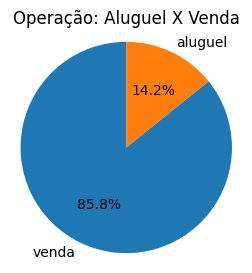

In [152]:
# Calcule as contagens de cada categoria
contagem_operacao = df['operacao'].value_counts()

# O gráfico de pizza de tipo do animal
plt.figure(figsize=(3, 3))
plt.pie(contagem_operacao, labels=contagem_operacao.index, autopct='%1.1f%%', startangle=90)
plt.title('Operação: Aluguel X Venda')
plt.axis('equal')
plt.show()

Analisando o gráfico de pizza é possível perceber que a base de dados está desbalanceado em relação ao tipo de operação imobiliária (Aluguel X Venda), isso pode afetar a precisão e a eficácia do seu modelo de precificação de imóveis.

Após a análise descritiva dos dados, será feito a separação da base de dados em imóveis que estão para venda e para aluguel, para assim, fazer o modelo de cada um.

Análise Descritiva dos dados de imóveis para a venda

In [153]:
#Base Venda
df_venda = df[df['operacao'] == 'venda']

In [154]:
df_venda.head()

,index,Título,Valor,area,quartos,suites,garagem,iptu,condominio,regiao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
6941,7130,SQSW 300,2290000.0,147.00,4,2,2,1252.5,1290.0,SUDOESTE,...,0,1,0,0,0,1,0,0,0,Apartamento
6942,7131,SHIS QL 8,6900000.0,750.00,5,5,4,3000.0,623.0,LAGO SUL,...,0,1,0,0,0,0,0,0,0,Casa
6943,7132,SMDB Conjunto 15,4900000.0,583.00,4,4,3,3000.0,1800.0,LAGO SUL,...,0,1,0,0,0,0,0,0,0,Casa
6944,7133,Condomínio Santa Bárbara,1290000.0,473.95,5,3,6,1590.0,559.5,JARDIM BOTANICO,...,0,0,0,0,0,1,0,0,0,Casa
6945,7134,SQS 304,2490000.0,177.00,3,1,0,1140.0,1310.0,ASA SUL,...,0,0,0,0,0,1,0,0,0,Apartamento


In [155]:
len(df_venda)

38858

In [156]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38858 entries, 6941 to 48407
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    38858 non-null  int64  
 1   Título                   38858 non-null  object 
 2   Valor                    38858 non-null  float64
 3   area                     38858 non-null  float64
 4   quartos                  38858 non-null  int64  
 5   suites                   38858 non-null  int64  
 6   garagem                  38858 non-null  int64  
 7   iptu                     38858 non-null  float64
 8   condominio               38858 non-null  float64
 9   regiao                   38858 non-null  object 
 10  cidade                   38858 non-null  object 
 11  imobiliaria              38858 non-null  object 
 12  creci                    38858 non-null  object 
 13  operacao                 38858 non-null  object 
 14  Aquecimento Solar  

Removendo as colunas que eu considero irrelevante para o modelo

In [157]:
df_venda = df_venda.drop(columns=[ 'index', 'Título', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])

In [158]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38858 entries, 6941 to 48407
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  38858 non-null  float64
 1   area                   38858 non-null  float64
 2   quartos                38858 non-null  int64  
 3   suites                 38858 non-null  int64  
 4   garagem                38858 non-null  int64  
 5   iptu                   38858 non-null  float64
 6   condominio             38858 non-null  float64
 7   regiao                 38858 non-null  object 
 8   Piscina                38858 non-null  int64  
 9   Sala de Ginástica      38858 non-null  int64  
 10  Varanda                38858 non-null  int64  
 11  Cozinha Espaçosa       38858 non-null  int64  
 12  Ar Condicionado        38858 non-null  int64  
 13  PlayGround             38858 non-null  int64  
 14  Salão de Festas        38858 non-null  int64  
 15 

Verificando a quantidade de dados pelos tipos e regiões.

In [159]:
df_venda['tipo'].value_counts()

Casa                 16757
Apartamento          14374
Lote/Terreno/Área     3463
Sala                  1653
Loja                   824
Kitnet                 615
Prédio                 384
Rural                  316
Hotel                  178
Garagem                121
Ponto                  115
Galpão                  40
Loteamento              18
Name: tipo, dtype: int64

In [160]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [161]:
df_venda['regiao'].value_counts()

JARDIM BOTANICO                       4361
NORTE                                 2665
SUL                                   2427
ASA NORTE                             2427
VICENTE PIRES                         2386
ASA SUL                               1910
ARNIQUEIRA                            1518
GUARA II                              1454
TAGUATINGA NORTE                      1335
NOROESTE                              1223
PARK WAY                              1147
LAGO SUL                              1134
LAGO NORTE                            1038
SUDOESTE                               953
SAMAMBAIA SUL                          880
SAMAMBAIA NORTE                        770
PONTE ALTA                             682
TAGUATINGA SUL                         680
GUARA I                                650
CEILANDIA NORTE                        553
SOBRADINHO                             522
CEILANDIA SUL                          509
PARK SUL                               488
ALTO DA BOA

Transformando as string em numérico

In [162]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_venda['regiao_encoded'] = label_encoder.fit_transform(df_venda['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
ADE: 0
ALPHAVILLE BRASILIA: 1
ALTIPLANO LESTE: 2
ALTO DA BOA VISTA: 3
AREAL: 4
ARNIQUEIRA: 5
ASA NORTE: 6
ASA SUL: 7
CANDANGOLANDIA: 8
CEILANDIA CENTRO: 9
CEILANDIA NORTE: 10
CEILANDIA SUL: 11
CENTRO: 12
CHACARAS ANHANGUERA: 13
CHACARAS IPANEMA: 14
CHACARAS SAIA VELHA: 15
CHACARAS SANTA MARIA: 16
CHACARAS YPIRANGA: 17
CIDADE JARDINS: 18
CIDADE OCIDENTAL: 19
COLONIA AGRICOLA SAMAMBAIA: 20
CONDOMINIO RK: 21
CONDOMÍNIO IMPÉRIO DOS NOBRES: 22
ENGENHO DAS LAGES: 23
ESTANCIA MESTRE DARMAS VI: 24
ESTANCIAS VILA RICA: 25
GRANDE COLORADO: 26
GRANJA DO TORTO: 27
GUARA I: 28
GUARA II: 29
IPIRANGA: 30
ITAPOA PARQUE: 31
ITAPUA: 32
JARDIM BOTANICO: 33
JARDIM CEU AZUL: 34
JARDIM FLAMBOYANT: 35
JARDIM IPANEMA: 36
JARDINS MANGUEIRAL: 37
JARDINS VERSAILLES: 38
LAGO NORTE: 39
LAGO SUL: 40
LOTEAMENTO RAQUEL PIMENTEL: 41
LUZILIA PARQUE: 42
MANSOES DE RECREIO ESTRELA DALVA: 43
MANSOES RECREIO MOSSORO: 44
MANSOES SULESTE: 45
METROPOLITANA: 46
NOROESTE: 47
NORTE: 48
NOVA BETANIA: 49
NOVA COLINA: 5

In [163]:
# Ajustar o encoder aos valores da coluna região
df_venda['tipo_encoded'] = label_encoder.fit_transform(df_venda['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Loteamento: 8
Ponto: 9
Prédio: 10
Rural: 11
Sala: 12


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [164]:
df_venda = df_venda.drop(columns=['regiao', 'tipo'])

In [165]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38858 entries, 6941 to 48407
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  38858 non-null  float64
 1   area                   38858 non-null  float64
 2   quartos                38858 non-null  int64  
 3   suites                 38858 non-null  int64  
 4   garagem                38858 non-null  int64  
 5   iptu                   38858 non-null  float64
 6   condominio             38858 non-null  float64
 7   Piscina                38858 non-null  int64  
 8   Sala de Ginástica      38858 non-null  int64  
 9   Varanda                38858 non-null  int64  
 10  Cozinha Espaçosa       38858 non-null  int64  
 11  Ar Condicionado        38858 non-null  int64  
 12  PlayGround             38858 non-null  int64  
 13  Salão de Festas        38858 non-null  int64  
 14  Projeto de Iluminação  38858 non-null  int64  
 15 

In [166]:
# Separar X e y
X_regressao = df_venda.drop('Valor', axis = 1)
y_regressao = df_venda[['Valor']]

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.3, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)


X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)


scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)


y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_venda
df_venda.head()

,Valor,area,quartos,suites,garagem,iptu,condominio,Piscina,Sala de Ginástica,Varanda,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
6941,2290000.0,147.00,4,2,2,1252.5,1290.0,1,1,1,...,1,0,1,1,0,0,0,0,111,0
6942,6900000.0,750.00,5,5,4,3000.0,623.0,1,0,1,...,0,0,1,1,0,0,0,0,40,1
6943,4900000.0,583.00,4,4,3,3000.0,1800.0,1,0,1,...,0,0,1,1,0,0,0,0,40,1
6944,1290000.0,473.95,5,3,6,1590.0,559.5,1,0,1,...,1,1,1,1,0,0,0,0,33,1
6945,2490000.0,177.00,3,1,0,1140.0,1310.0,0,0,0,...,1,1,0,1,0,0,0,0,7,0


Criar modelo e Treinar o modelo

In [167]:
# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_regressao, y_regressao)

LinearRegression()

In [168]:
# Coeficientes (parâmetros) do modelo
print("Coeficientes:", model.coef_)

Coeficientes: [[ 1.65179422e-02  1.23928297e-02  2.23745117e-02  2.16129909e-02
   3.71045037e-03 -1.33196338e-03  1.21177304e-04  2.46309656e-04
  -2.12815228e-04  3.92534014e-04  2.19987265e-04 -1.24539802e-04
   9.97194061e-05  5.68532969e-05 -2.28176422e-04  3.30974127e-05
  -2.21119278e-04 -3.46944695e-18  2.60208521e-18 -2.97127545e-04
   0.00000000e+00 -2.54242679e-04  3.97434169e-04]]


In [169]:
# Intercepto do modelo
print("Intercepto:", model.intercept_)

Intercepto: [0.00026635]


Metricas e Avaliação do Modelo

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [171]:
#Avaliando previsões e erro
predictions = model.predict(X_test_regressao)
print("Previsões:", predictions)

print(mean_absolute_error(y_test_regressao, predictions))
print(mean_squared_error(y_test_regressao, predictions))

Previsões: [[0.00109625]
 [0.00185516]
 [0.00146853]
 ...
 [0.00084244]
 [0.00059135]
 [0.00043754]]
0.0005316209837458499
1.6198890971310837e-06


In [172]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_regressao, predictions)
print(r2)

0.04778397567173975


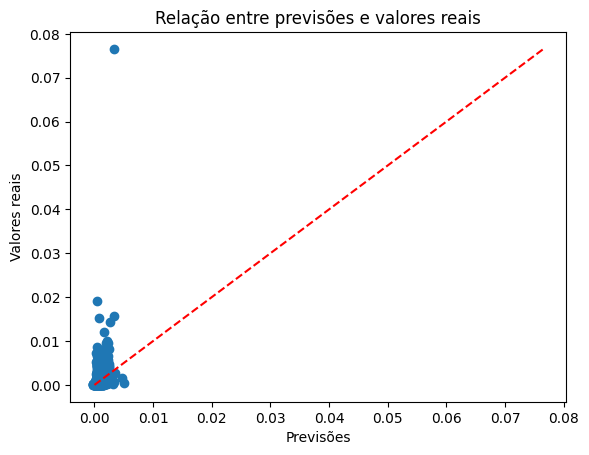

In [173]:
import matplotlib.pyplot as plt

# Visualizando a relação entre y_test e as previsões
fig, ax = plt.subplots()

ax.scatter(predictions, y_test_regressao)
ax.plot([min(y_test_regressao), max(y_test_regressao)], [min(y_test_regressao), max(y_test_regressao)], '--r')

plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.title('Relação entre previsões e valores reais')

plt.show()

In [174]:
# Avaliando o modelo
train_score = model.score(X_train_regressao, y_train_regressao)
val_score = model.score(X_val_regressao, y_val_regressao)
test_score = model.score(X_test_regressao, y_test_regressao)

print("Score de treinamento:", train_score)
print("Score de validação:", val_score)
print("Score de teste:", test_score)

Score de treinamento: 0.001256958570192812
Score de validação: 0.0010792886401697066
Score de teste: 0.04778397567173975


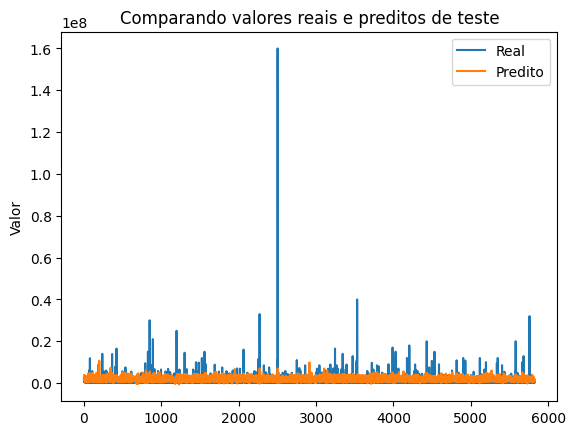

In [175]:
predict = model.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

Análise Descritiva dos dados de imóveis para a Aluguel

In [176]:
#Base Venda
df_aluguel = df[df['operacao'] == 'aluguel']

In [177]:
df_aluguel.head()

,index,Título,Valor,area,quartos,suites,garagem,iptu,condominio,regiao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,0,0,0,5600.0,2000.0,ASA SUL,...,0,0,0,0,0,0,0,0,0,Prédio
1,1,Rua 14,2000.0,63.0,2,1,1,86.0,486.0,SUL,...,0,0,0,0,0,0,0,0,0,Apartamento
2,2,SQNW 310 Bloco B,5100.0,76.0,2,1,2,409.0,791.0,NOROESTE,...,0,1,0,0,0,0,0,0,0,Apartamento
3,3,Rua COPAIBA,1800.0,32.0,0,0,1,344.5,400.0,NORTE,...,0,0,0,0,0,0,0,0,0,Sala
4,4,SHIS QL 12,95000.0,1952.0,15,0,0,15659.0,623.0,LAGO SUL,...,0,0,0,0,0,0,0,0,0,Casa


In [178]:
len(df_aluguel)

6440

In [179]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6440 entries, 0 to 6939
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    6440 non-null   int64  
 1   Título                   6440 non-null   object 
 2   Valor                    6440 non-null   float64
 3   area                     6440 non-null   float64
 4   quartos                  6440 non-null   int64  
 5   suites                   6440 non-null   int64  
 6   garagem                  6440 non-null   int64  
 7   iptu                     6440 non-null   float64
 8   condominio               6440 non-null   float64
 9   regiao                   6440 non-null   object 
 10  cidade                   6440 non-null   object 
 11  imobiliaria              6440 non-null   object 
 12  creci                    6440 non-null   object 
 13  operacao                 6440 non-null   object 
 14  Aquecimento Solar       

Removendo as colunas que eu considero irrelevante para o modelo

In [180]:
df_aluguel = df_aluguel.drop(columns=[ 'index', 'Título', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])


In [181]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6440 entries, 0 to 6939
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  6440 non-null   float64
 1   area                   6440 non-null   float64
 2   quartos                6440 non-null   int64  
 3   suites                 6440 non-null   int64  
 4   garagem                6440 non-null   int64  
 5   iptu                   6440 non-null   float64
 6   condominio             6440 non-null   float64
 7   regiao                 6440 non-null   object 
 8   Piscina                6440 non-null   int64  
 9   Sala de Ginástica      6440 non-null   int64  
 10  Varanda                6440 non-null   int64  
 11  Cozinha Espaçosa       6440 non-null   int64  
 12  Ar Condicionado        6440 non-null   int64  
 13  PlayGround             6440 non-null   int64  
 14  Salão de Festas        6440 non-null   int64  
 15  Proj

In [182]:
df_aluguel['tipo'].value_counts()

Sala                 1861
Apartamento          1777
Loja                 1254
Casa                  851
Kitnet                259
Prédio                189
Garagem                87
Ponto                  50
Hotel                  39
Galpão                 37
Lote/Terreno/Área      35
Rural                   1
Name: tipo, dtype: int64

In [183]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [184]:
df_aluguel['regiao'].value_counts()

ASA NORTE                             1164
ASA SUL                               1132
NORTE                                  433
SUL                                    352
TAGUATINGA NORTE                       338
JARDIM BOTANICO                        268
LAGO SUL                               240
GUARA II                               197
SUDOESTE                               183
NOROESTE                               179
TAGUATINGA SUL                         165
VICENTE PIRES                          112
LAGO NORTE                             111
GUARA I                                107
AREAL                                  100
TAGUATINGA CENTRO                       97
SAMAMBAIA SUL                           90
SIA                                     89
SIG                                     84
PARK SUL                                82
NUCLEO BANDEIRANTE                      81
CEILANDIA NORTE                         70
SAMAMBAIA NORTE                         66
RIACHO FUND

Transformando as string em numérico

In [185]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_aluguel['regiao_encoded'] = label_encoder.fit_transform(df_aluguel['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
ADE: 0
ALPHAVILLE BRASILIA: 1
ALTIPLANO LESTE: 2
ALTO DA BOA VISTA: 3
AREAL: 4
ARNIQUEIRA: 5
ASA NORTE: 6
ASA SUL: 7
CANDANGOLANDIA: 8
CEILANDIA CENTRO: 9
CEILANDIA NORTE: 10
CEILANDIA SUL: 11
CENTRO: 12
CHACARAS YPIRANGA: 13
COLONIA AGRICOLA SAMAMBAIA: 14
CONDOMINIO RK: 15
CONDOMÍNIO IMPÉRIO DOS NOBRES: 16
GRANDE COLORADO: 17
GRANJA DO TORTO: 18
GUARA I: 19
GUARA II: 20
IPIRANGA: 21
ITAPOA PARQUE: 22
ITAPUA: 23
JARDIM BOTANICO: 24
JARDINS MANGUEIRAL: 25
LAGO NORTE: 26
LAGO SUL: 27
METROPOLITANA: 28
NOROESTE: 29
NORTE: 30
NOVO: 31
NUCLEO BANDEIRANTE: 32
NUCLEO RURAL LAGO OESTE: 33
OCTOGONAL: 34
PARANOA: 35
PARANOA PARQUE: 36
PARK SUL: 37
PARK WAY: 38
PARQUE DAS AGUAS BONITAS I: 39
PARQUE DAS CACHOEIRAS: 40
PARQUE DAS FLORES: 41
PARQUE ESPLANADA II: 42
PARQUE ESPLANADA III: 43
PONTE ALTA: 44
QUADRAS ECONOMICAS LUCIO COSTA: 45
RECANTO DAS EMAS: 46
REGIAO DOS LAGOS: 47
RESIDENCIAL SANTOS DUMONT: 48
RESIDENCIAL VILLA SUICA: 49
RIACHO FUNDO: 50
RIACHO FUNDO II: 51
SAAN: 52
SAMAM

In [186]:
# Ajustar o encoder aos valores da coluna região
df_aluguel['tipo_encoded'] = label_encoder.fit_transform(df_aluguel['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Ponto: 8
Prédio: 9
Rural: 10
Sala: 11


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [187]:
df_aluguel = df_aluguel.drop(columns=['regiao', 'tipo'])

In [188]:
# Separar X e y
X_regressao = df_aluguel.drop('Valor', axis = 1)
y_regressao = df_aluguel[['Valor']]

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.3, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)


X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)


scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)


y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_aluguel
df_aluguel.head()

,Valor,area,quartos,suites,garagem,iptu,condominio,Piscina,Sala de Ginástica,Varanda,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
0,7000.0,200.0,0,0,0,5600.0,2000.0,0,0,0,...,0,0,0,0,0,0,0,0,7,9
1,2000.0,63.0,2,1,1,86.0,486.0,1,0,0,...,0,0,0,0,0,0,0,0,76,0
2,5100.0,76.0,2,1,2,409.0,791.0,1,0,0,...,0,0,0,0,0,0,0,0,29,0
3,1800.0,32.0,0,0,1,344.5,400.0,0,0,0,...,0,0,0,0,0,0,0,0,30,11
4,95000.0,1952.0,15,0,0,15659.0,623.0,0,0,0,...,0,0,0,0,0,0,0,0,27,1


Criar modelo e Treinar o modelo

In [189]:
# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_regressao, y_regressao)

LinearRegression()

In [190]:
# Coeficientes (parâmetros) do modelo
print("Coeficientes:", model.coef_)

Coeficientes: [[ 1.71142825e-01 -3.40113244e-03  2.30438155e-04  6.66105216e-02
  -1.86153612e-03  6.54671121e-02  2.43383795e-04  1.07870708e-03
  -6.23189454e-04 -3.02697184e-03 -6.75304423e-04 -6.79812612e-04
  -6.27901952e-04  5.37020999e-03 -1.02159933e-03 -1.98590010e-03
   3.83291823e-03  6.93889390e-18  4.33680869e-18 -1.74671978e-03
   0.00000000e+00 -7.80013541e-04  1.08792894e-04]]


In [191]:
# Intercepto do modelo
print("Intercepto:", model.intercept_)

Intercepto: [0.00038622]


Metricas e Avaliação do Modelo

In [192]:
#Avaliando previsões e erro
predictions = model.predict(X_test_regressao)
print("Previsões:", predictions)

print(mean_absolute_error(y_test_regressao, predictions))
print(mean_squared_error(y_test_regressao, predictions))

Previsões: [[ 2.35747907e-03]
 [ 2.89094526e-03]
 [ 3.19467732e-03]
 [ 4.51877266e-03]
 [ 3.68014052e-04]
 [ 1.13292305e-03]
 [-1.76198686e-04]
 [ 1.07525250e-03]
 [-4.68852736e-04]
 [ 4.23963986e-03]
 [ 5.09070216e-03]
 [ 4.83730222e-05]
 [ 1.62413161e-03]
 [ 7.05254901e-04]
 [ 1.05702062e-03]
 [ 4.30412723e-03]
 [ 4.81023770e-03]
 [ 1.52551136e-03]
 [ 7.51347731e-04]
 [ 4.37775633e-04]
 [ 7.10608570e-03]
 [ 2.78169466e-03]
 [ 7.58532583e-04]
 [ 3.84436356e-05]
 [ 2.47036196e-03]
 [-4.62148183e-04]
 [ 1.23221270e-03]
 [ 3.57276321e-04]
 [ 1.02921302e-04]
 [ 7.23511536e-04]
 [ 1.17612830e-03]
 [ 2.50414373e-03]
 [ 7.33907286e-04]
 [-1.55809493e-03]
 [ 3.99766885e-03]
 [ 4.90474571e-04]
 [ 6.77011850e-04]
 [-2.17476352e-04]
 [ 1.81508516e-03]
 [ 3.57774224e-03]
 [ 3.93998780e-04]
 [-2.49461688e-03]
 [-5.59514307e-05]
 [ 7.92705068e-04]
 [ 1.93953003e-03]
 [ 7.09661459e-04]
 [ 1.63256850e-03]
 [ 1.04773729e-03]
 [ 2.53867376e-03]
 [ 5.99513640e-04]
 [-2.80032850e-04]
 [ 1.39435486e-04]
 

In [193]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_regressao, predictions)
print(r2)

0.6989866750427862


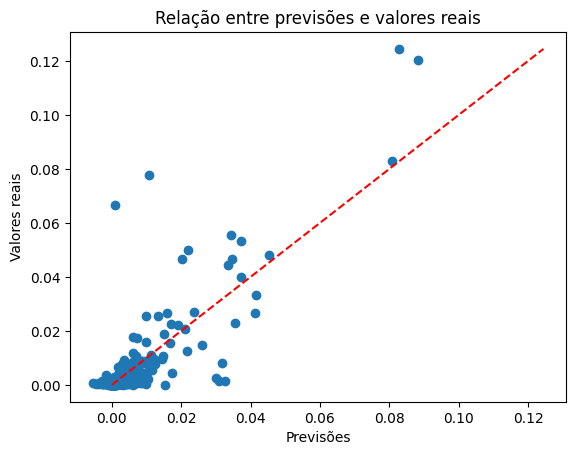

In [194]:
# Visualizando a relação entre y_test e as previsões
fig, ax = plt.subplots()

ax.scatter(predictions, y_test_regressao)
ax.plot([min(y_test_regressao), max(y_test_regressao)], [min(y_test_regressao), max(y_test_regressao)], '--r')

plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.title('Relação entre previsões e valores reais')

plt.show()


In [195]:
# Avaliando o modelo
train_score = model.score(X_train_regressao, y_train_regressao)
val_score = model.score(X_val_regressao, y_val_regressao)
test_score = model.score(X_test_regressao, y_test_regressao)

print("Score de treinamento:", train_score)
print("Score de validação:", val_score)
print("Score de teste:", test_score)

Score de treinamento: 0.6930012929672971
Score de validação: 0.1249840105827662
Score de teste: 0.6989866750427862


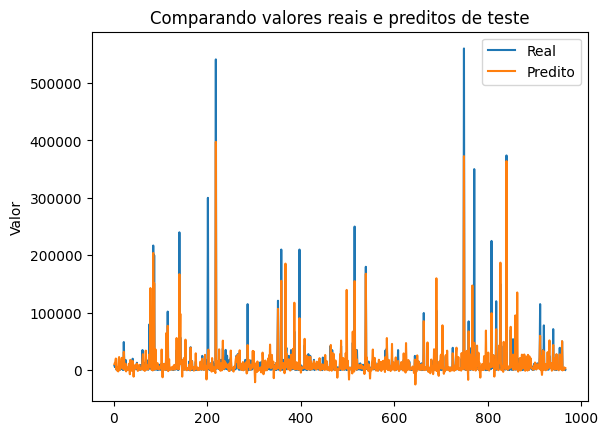

In [196]:
predict = model.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()